### Shortcuts

You select a cell (left, not inside the cell, by the side)  
If you press "a", it creates a cell Above  
If you press "b", you create a cell Below

If you press "Shft + Enter", you run the cell

If you press "d" twice, you delete the cell

## Types of cell

## Markdowns  

(instead of being a "code cell", if you want to put text go to Cell --> Cell type --> Markdown)

# Header 1  
## Header 2
### Header 3  
#### header 4 ....

If you want different lines, after the sentence make 2 SPACES  

If you just do enter
It looks like this (althogh when you edit they are at different lines)

If you do 2 spaces and enter  
It looks like this


***to make it in bold, use the astheristcs***

In [4]:
# Simple imports

import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import os

In [6]:
## The %matplotlib inline will make your plot outputs appear and be stored within the notebook
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
# You want to import one of your functions:

# Put your function in the site-packages folder.  
# If you use anaconda it will look something like this:

# C:\Users\David\Anaconda3\envs\python3\Lib\site-packages

from linares_plot import *



In [ ]:
## You can also create a file with many functions and run it

root= os.getcwd()
functionc_path = 'C:\\Users\\David\\functions'

os.chdir(fnc_path)
%run "Funciones.ipynb"
os.chdir(root)

['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6', '#ffffcc', '#e5d8bd', '#fddaec', '#f2f2f2', '#fbb4ae', '#b3cde3', '#ccebc5']


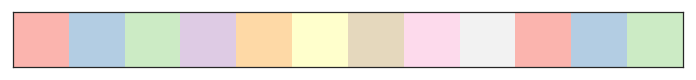

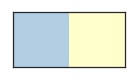

In [7]:
## Style of the plots 
sns.set()
sns.set_style('white')

#Example of palettes! Very useful
print(sns.color_palette("Pastel1", n_colors=12, desat=1).as_hex())
sns.palplot(sns.color_palette("Pastel1", n_colors=12))
plt.show()

## create the pallete you want
flatui = ['#b3cde3', '#ffffcc']
sns.set_palette(flatui)
sns.palplot(flatui)
plt.show()


In [ ]:
https://seaborn.pydata.org/generated/seaborn.set_style.html

### Add images to the Jupyter notebook   
Make a markdown cell and put the path

![](seaborn_palettes.png)

### Add links to the Jupyter notebook   
Make a markdown cell and put the path

You can look at the [different styles](https://seaborn.pydata.org/generated/seaborn.set_style.html) of seaborn

In [ ]:
## RANDOM PLOT WITH USEFUL AESTHETICS!!! 
### Take a look because you may use some of this in other plots!!!

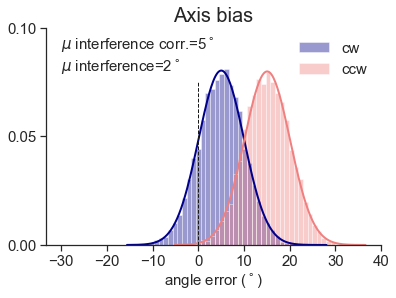

In [18]:

##Generate fake data

effect_axis=10 #
target=80
real_error = 5 ## attraction of 5 degrees
distractor_dit = 10
response_cw = np.random.normal(target - effect_axis + real_error, 5, 10000)
response_ccw = np.random.normal(target- effect_axis - real_error, 5, 10000)
cw=pd.DataFrame({'response':response_cw})
cw['target'] = target
cw['orient'] = 'cw'
cw['distractor'] = target + distractor_dit
ccw=pd.DataFrame({'response':response_ccw})
ccw['target'] = target
ccw['orient'] = 'ccw'
ccw['distractor'] = target - distractor_dit
df=pd.concat([cw, ccw], ignore_index=True)
df['error'] = df['target'] - df['response']
df.head(10)




#### HISTOGRAM
## Fiting a normal distribution! (changing the colors and the width of the fiting line)
## seting the bins size

sns.distplot(df.loc[df['orient']=='cw', 'error'] , bins=np.linspace(-30,30,60), label='cw',
              fit=norm, kde=False, fit_kws={"color":'darkblue', 'linewidth':2},  color='darkblue')

sns.distplot(df.loc[df['orient']=='ccw', 'error'] , bins=np.linspace(-30,30,60), label='ccw',
              fit=norm, kde=False, fit_kws={"color":'lightcoral', 'linewidth':2},  color='lightcoral')


plt.legend(frameon=False, loc=1, fontsize=15) #No frame in the legend

##Remove top and right axis and spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()

## X label using LATEX for the degrees
plt.xlabel(r'angle error ($^\circ$)', fontsize=15)
plt.ylim(0, 0.1)
plt.yticks([0,0.05, 0.1], fontsize=15)
plt.xticks(fontsize=15)
plt.plot([0,0], [0,0.075], 'k--', linewidth=1)
plt.title('Axis bias', fontsize=20)

## Text, again using latex
plt.text(-30, 0.08, r'$\mu$ interference=' + str(2) + '$^\circ$', fontsize=15)
plt.text(-30, 0.09, r'$\mu$ interference corr.=' + str(5) + '$^\circ$', fontsize=15);


### Save as .svg if needed!
##plt.savefig('C:\\Users\\David\\Desktop\\no_axis_bias_method.svg', transparent=True )

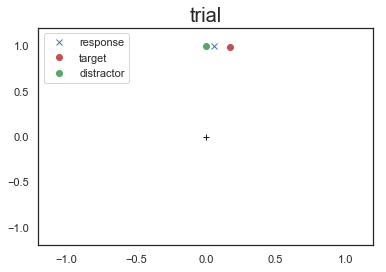

In [25]:
#### Visualize a TRIAL

ex_trial=6
plt.plot(0, 0, 'k+')
plt.plot( np.cos(   np.radians(df.iloc[ex_trial,0])    ), np.sin(    np.radians(df.iloc[ex_trial,0])    ), 'bx', label='response')
plt.plot( np.cos(   np.radians(df.iloc[ex_trial,1])    ), np.sin(    np.radians(df.iloc[ex_trial,1])    ), 'ro', label='target')
plt.plot( np.cos(   np.radians(df.iloc[ex_trial,3])    ), np.sin(    np.radians(df.iloc[ex_trial,3])    ), 'go', label='distractor')

plt.legend(loc=2)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.title('trial', fontsize=20)
plt.show()